In [13]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister
np.set_printoptions(suppress = True)
from importlib import reload
import functions, arithmetic, circuits
from functions import *
from arithmetic import *
from circuits import *

functions = reload(functions)
arithmetic = reload(arithmetic)
circuits = reload(circuits)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
# fourier space addition
reverse_bool = False
n = 4
control_width = 2
no_qubits = 2 * n + control_width

delta = 4

reg_control = QuantumRegister(2, name="reg_c")
reg_b = QuantumRegister(n, name="reg_b")
reg_phi = QuantumRegister(n, name="reg_phi")
cr = ClassicalRegister(no_qubits, name="reg_output")

qc = QuantumCircuit(reg_control, reg_phi, reg_b, cr)

qc.x(reg_b[i] for i in [1])
qc.x(reg_phi[i] for i in [0,1])
qc.x(reg_control[i] for i in range(control_width))

qc.barrier()

qc.append(nbitCtrlAdditionTransform(n, reg_control, reg_b, reg_phi, delta), reg_control[0:control_width] + reg_b[0:n] + reg_phi[0:n])

qc.measure(range(no_qubits), range(no_qubits))

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=2**10)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


# plotShor(no_qubits, len_exp, counts, g, N)
hist = plot_histogram(counts)
display(hist)

decomposed = qc.decompose(reps=2)

print("operation count: {}".format(sum(dict(decomposed.count_ops()).values())))
print("operations: {}".format(dict(decomposed.count_ops())))

In [15]:
a = 1
b = 1
delta = 4
reverse_bool = False

qc = fourierSpaceAdderCircuit(a, b, delta, reverse_bool)

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

counts = convertKeys(counts)
for outcome, count in counts.items():
    print("{}: {}%".format(outcome, count / sum(counts.values()) * 100))


{'1': 1024}
1: 100.0%


c:\Users\Julek\miniconda3\envs\quantum\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:163: UserWarning: Style JSON file 'bw.json' not found in any of these locations: c:\Users\Julek\miniconda3\envs\quantum\lib\site-packages\qiskit\visualization\circuit\styles\bw.json, bw.json. Will use default style.
  self._style, def_font_ratio = load_style(style)


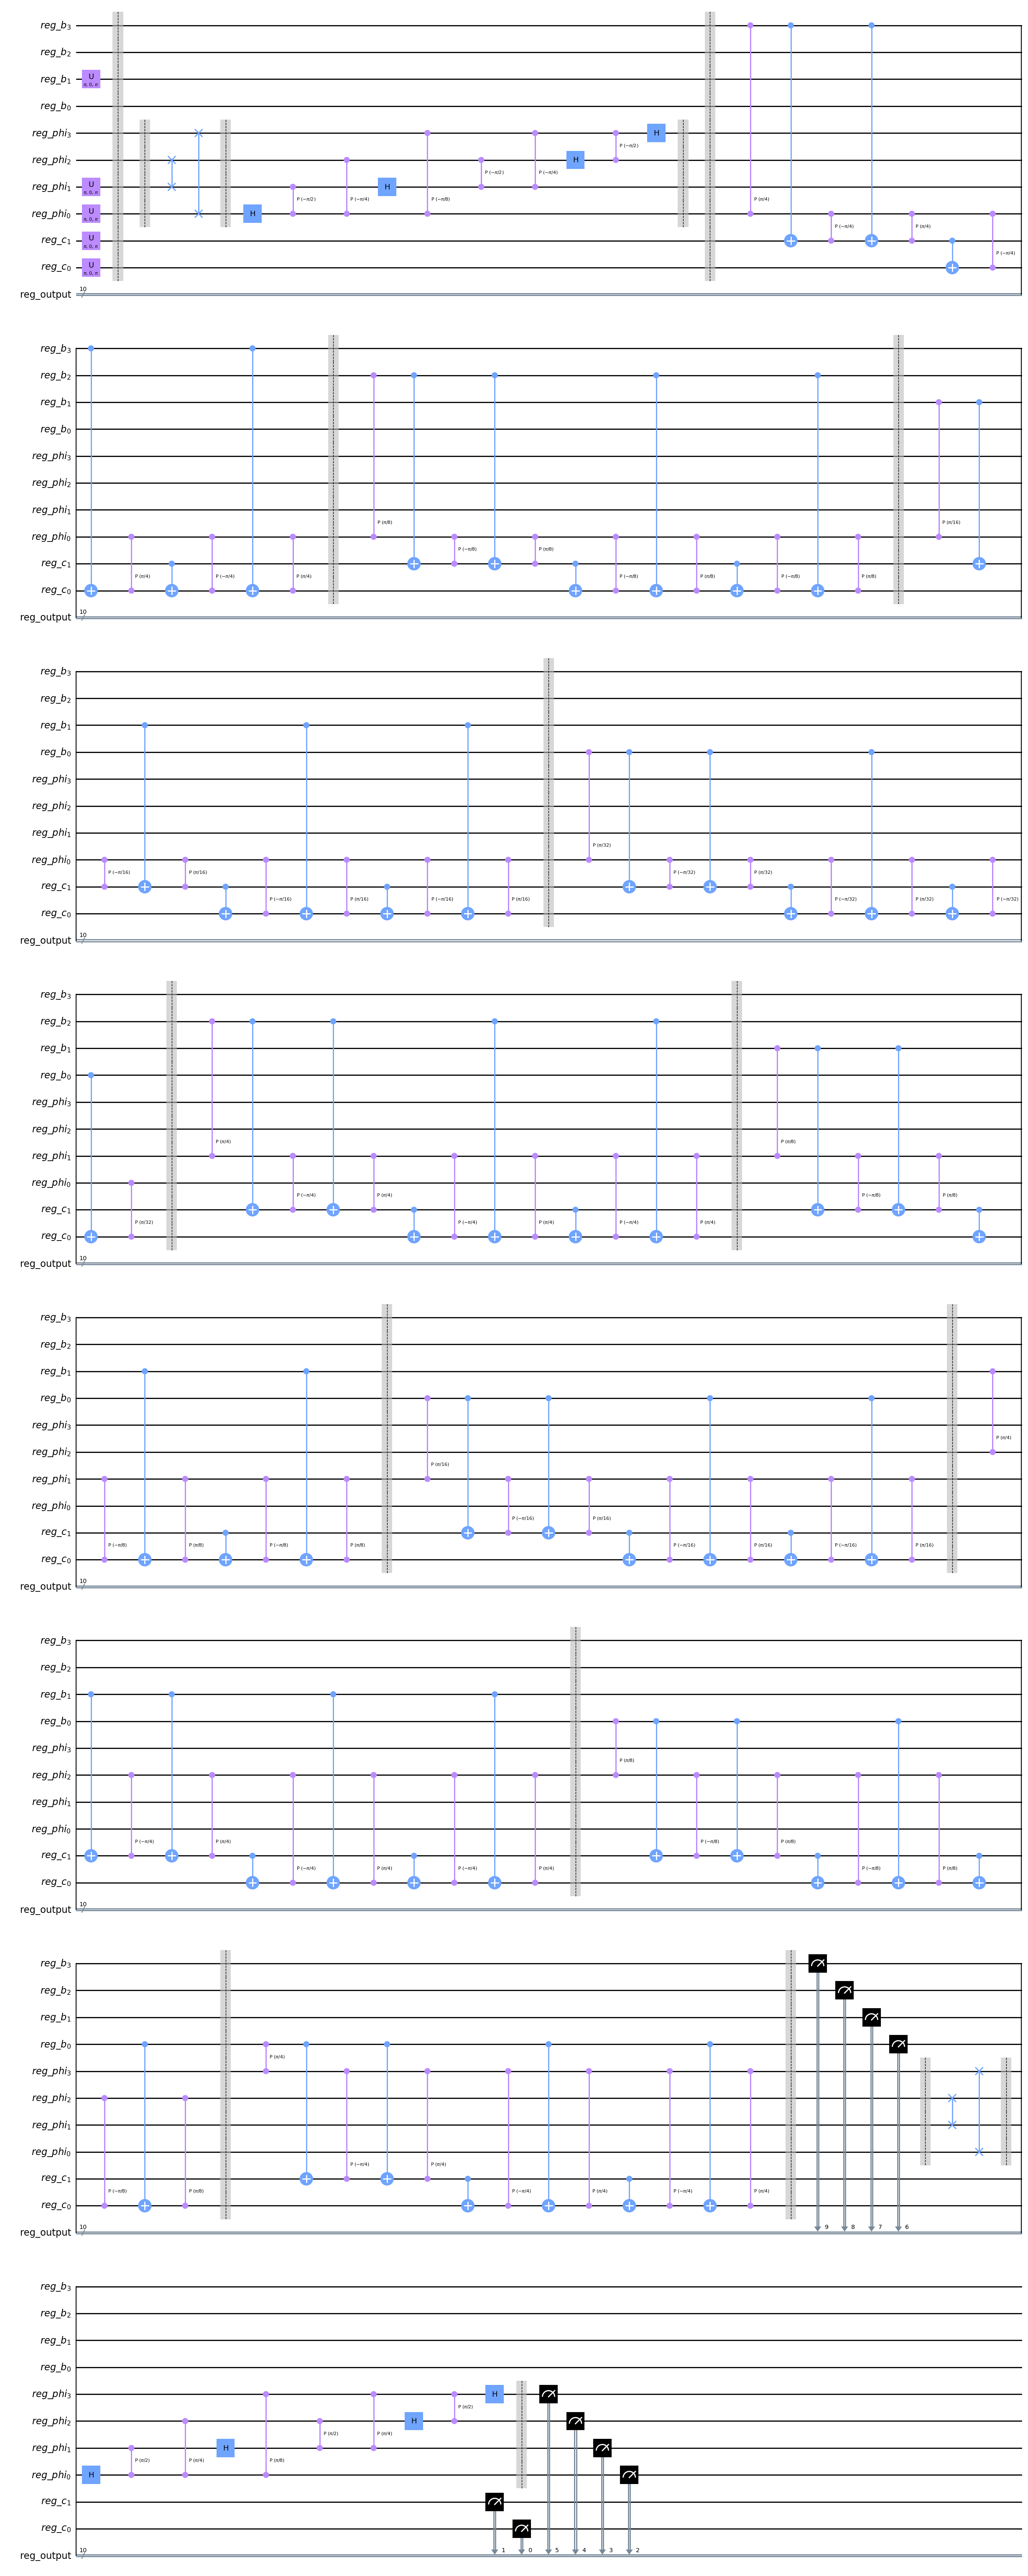

In [4]:

decomposed.draw(reverse_bits=True, output="mpl", style="bw", fold=35, justify='right', filename="circuits/{}-bitFourierSpaceAdder.png".format(n, "Reversed" if reverse_bool == True else ""))


In [4]:
# fourier space modular addition
reverse_bool  =False
n = 2
no_qubits = n + 2

delta = 4

A = 1

reg_control = QuantumRegister(2, name="reg_c")
reg_phi = QuantumRegister(n, name="reg_phi")
cr = ClassicalRegister(no_qubits, name="reg_output")

qc = QuantumCircuit(reg_control, reg_phi, cr)

qc.x(reg_phi[i] for i in [1])
qc.x(reg_control[i] for i in range(control_width))

qc.append(nbitClassCtrlFourierAdder(n, A, reg_control, reg_phi, delta), reg_control[0:2] + reg_phi[0:n])

qc.measure(range(no_qubits), range(no_qubits))

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=2**10)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

hist = plot_histogram(counts)
display(hist)

decomposed = qc.decompose(reps=1)
decomposed.draw(reverse_bits=True, output="mpl", style="bw", fold=-1, justify='right', filename="circuits/{}-bitFourierSpaceModAdder.png".format(n, "Reversed" if reverse_bool == True else ""))

binA = 01
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[1]) = 1


CircuitError: 'The amount of qubit arguments 4 does not match the instruction expectation (2).'

binA = 11
int(binA[0]) = 1
int(binA[0]) = 1
int(binA[1]) = 1


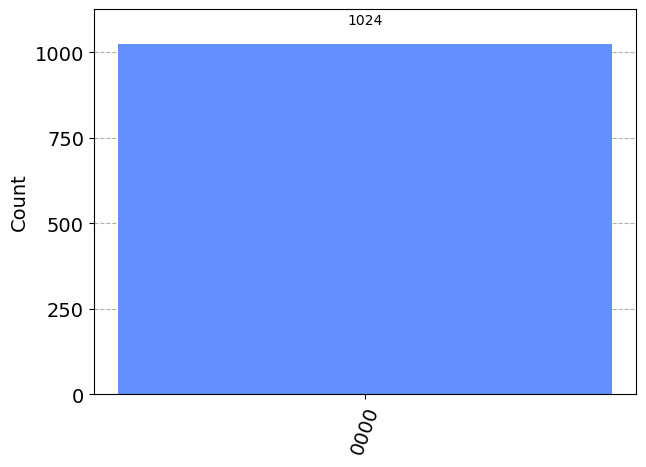

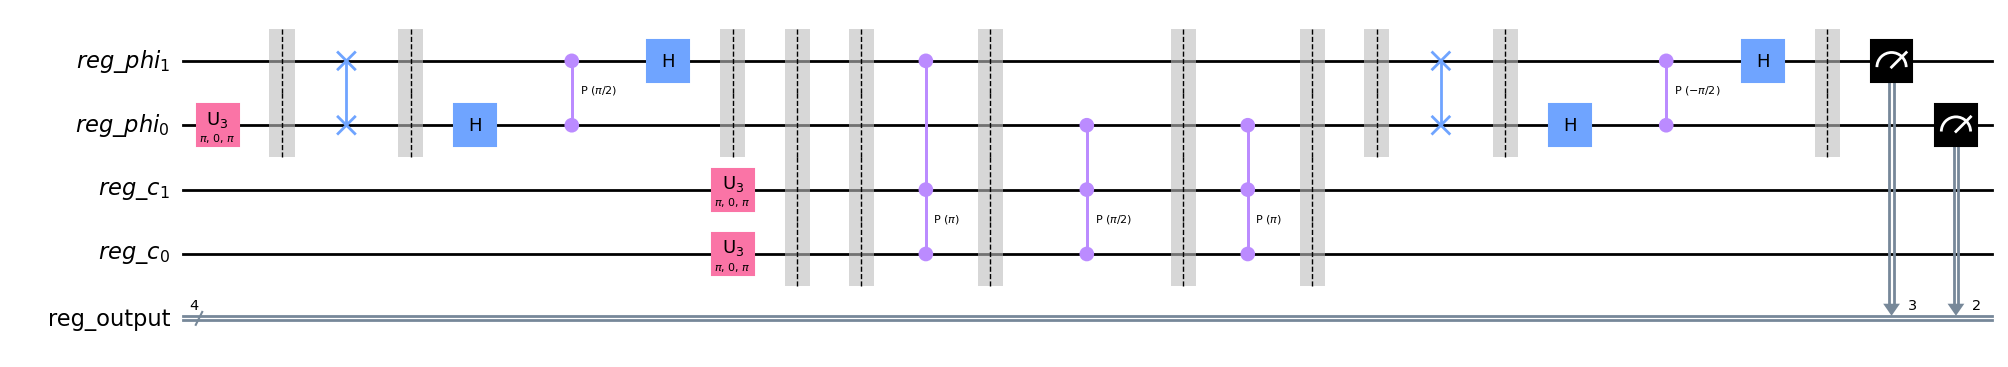

In [62]:
# fourier space modular addition
reverse_bool = False
n = 2
control_width = 2
no_qubits = n + control_width

delta = 4

A = 3

reg_control = QuantumRegister(2, name="reg_c")
reg_phi = QuantumRegister(n, name="reg_phi")
cr = ClassicalRegister(no_qubits, name="reg_output")

qc = QuantumCircuit(reg_control, reg_phi, cr)

qc.x(reg_phi[i] for i in [0])
qc.x(reg_control[i] for i in range(control_width))

qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=False), reg_phi[0:n])
qc.append(nbitClassCtrlFourierAdder(n, A, reg_phi, reg_control, delta, controlled=True, reverse=True), reg_control[0:2] + reg_phi[0:n])
qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=True), reg_phi[0:n])

qc.measure([2,3], [2,3])

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=2 ** 10)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

hist = plot_histogram(counts)
display(hist)

decomposed = qc.decompose(reps=1)
decomposed.draw(reverse_bits=True, output="mpl", fold=-1, justify='right',
                filename="circuits/{}-bitFourierSpaceModAdder.png".format(n, "Reversed" if reverse_bool == True else ""))

binA = 0011
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[1]) = 0
int(binA[1]) = 0
int(binA[1]) = 0
int(binA[2]) = 1
int(binA[2]) = 1
int(binA[3]) = 1
binA = 1111
int(binA[0]) = 1
int(binA[0]) = 1
int(binA[0]) = 1
int(binA[0]) = 1
int(binA[1]) = 1
int(binA[1]) = 1
int(binA[1]) = 1
int(binA[2]) = 1
int(binA[2]) = 1
int(binA[3]) = 1
binA = 1111
int(binA[0]) = 1
int(binA[0]) = 1
int(binA[0]) = 1
int(binA[0]) = 1
int(binA[1]) = 1
int(binA[1]) = 1
int(binA[1]) = 1
int(binA[2]) = 1
int(binA[2]) = 1
int(binA[3]) = 1
binA = 0011
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[1]) = 0
int(binA[1]) = 0
int(binA[1]) = 0
int(binA[2]) = 1
int(binA[2]) = 1
int(binA[3]) = 1
binA = 0011
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[0]) = 0
int(binA[1]) = 0
int(binA[1]) = 0
int(binA[1]) = 0
int(binA[2]) = 1
int(binA[2]) = 1
int(binA[3]) = 1


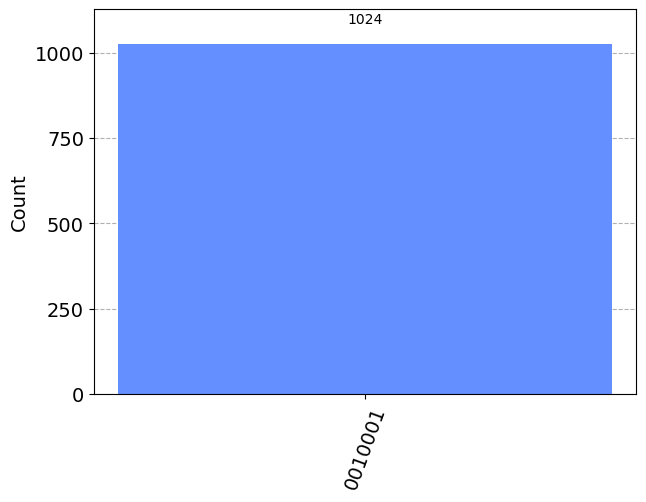

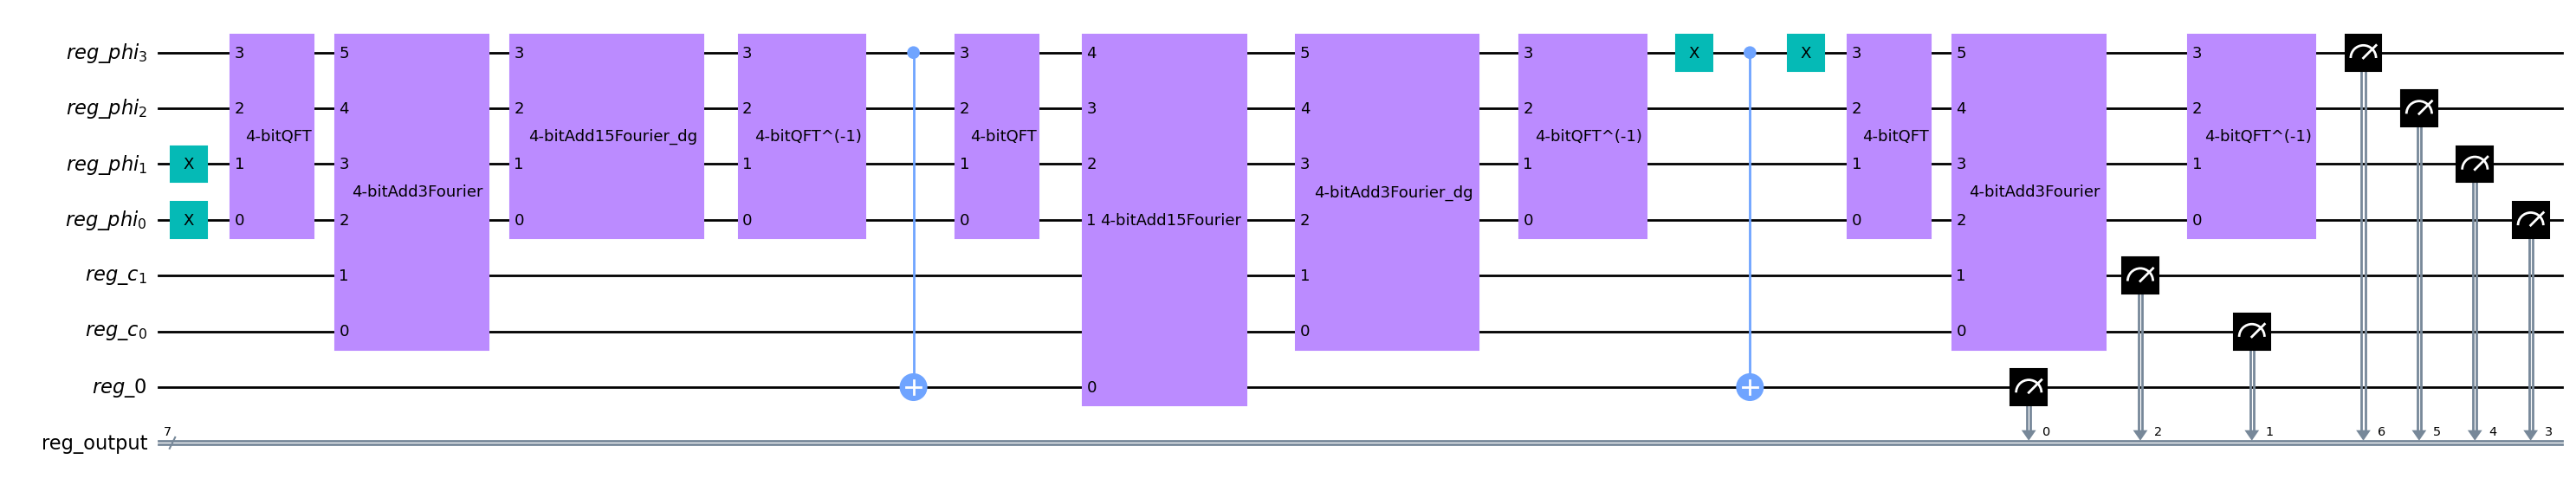

In [18]:
# fourier space modular addition
reverse_bool = False
n = 4
N = 15
control_width = 2
no_qubits = n + control_width + 1

delta = 4

A = 3

reg_control = QuantumRegister(2, name="reg_c")
reg_phi = QuantumRegister(n, name="reg_phi")
reg_0 = QuantumRegister(1, name="reg_0")
cr = ClassicalRegister(no_qubits, name="reg_output")

qc = QuantumCircuit(reg_0, reg_control, reg_phi, cr)

qc.x([reg_phi[x] for x in [0,1]])
qc.x([reg_control[x] for x in range(control_width)])

qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=False), reg_phi[0:n])
qc.append(nbitClassCtrlFourierAdder(n, A, reg_phi, reg_control = reg_control, delta=delta, controlled=True), reg_control[0:2] + reg_phi[0:n])
qc.append(nbitClassCtrlFourierAdder(n, N, reg_phi, delta=delta, controlled=False, reversed=True), reg_phi[0:n])

qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=True), reg_phi[0:n])
qc.cx(reg_phi[-1], reg_0[0])
qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=False), reg_phi[0:n])

qc.append(nbitClassCtrlFourierAdder(n, N, reg_phi, reg_0=reg_0, delta=delta, controlled=True, reversed=False), reg_0[0:1] + reg_phi[0:n])
qc.append(nbitClassCtrlFourierAdder(n, A, reg_phi, reg_control = reg_control, delta=delta, controlled=True, reversed=True), reg_control[0:2] + reg_phi[0:n])

qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=True), reg_phi[0:n])
qc.x(reg_phi[-1])
qc.cx(reg_phi[-1], reg_0[0])
qc.x(reg_phi[-1])
qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=False), reg_phi[0:n])

qc.append(nbitClassCtrlFourierAdder(n, A, reg_phi, reg_control = reg_control, delta=delta, controlled=True), reg_control[0:2] + reg_phi[0:n])

qc.append(nbitQFT(n, reg_phi, delta=delta, reversed=True), reg_phi[0:n])

qc.measure(range(no_qubits), range(no_qubits))

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=2 ** 10)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

hist = plot_histogram(counts)
display(hist)

decomposed = qc.decompose(reps=0)
decomposed.draw(reverse_bits=True, output="mpl", style="bw", fold=-1, justify='right',
                filename="circuits/{}-bitFourierSpaceModAdder.png".format(n, "Reversed" if reverse_bool == True else ""))